In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('../data/raw/drugs_train.tsv', sep='\t')
test = pd.read_csv('../data/raw/drugs_test.tsv', sep='\t')

In [3]:
train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
print("Missing data in TRAIN file: \n{}".format(train.isnull().sum()))

Missing data in TRAIN file: 
Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64


In [5]:
print("Missing data in TEST file: \n{}".format(test.isnull().sum()))

Missing data in TEST file: 
Unnamed: 0       0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64


In [6]:
print("Number of unique drugs: {}".format(train.drugName.unique().shape[0]))
print("Number of unique conditions: {}".format(train.condition.unique().shape[0]))

Number of unique drugs: 3436
Number of unique conditions: 885


In [7]:
print("Conditions per drugs")
train.groupby('drugName')['condition'].unique().head(15)

Conditions per drugs


drugName
A + D Cracked Skin Relief                                      [Bacterial Skin Infection]
A / B Otic                                                                 [Otitis Media]
Abacavir / dolutegravir / lamivudine                                      [HIV Infection]
Abacavir / lamivudine / zidovudine                                        [HIV Infection]
Abatacept                               [Rheumatoid Arthritis, Juvenile Idiopathic Art...
Abilify                                 [Autism, Agitated State, Schizoaffective Disor...
Abilify Discmelt                         [Post Traumatic Stress Disorde, Bipolar Disorde]
Abilify Maintena                                                          [Schizophrenia]
Abiraterone                                                              [Prostate Cance]
AbobotulinumtoxinA                                    [acial Wrinkles, Cervical Dystonia]
Abraxane                                                 [Breast Cance, Pancreatic Cance]
A

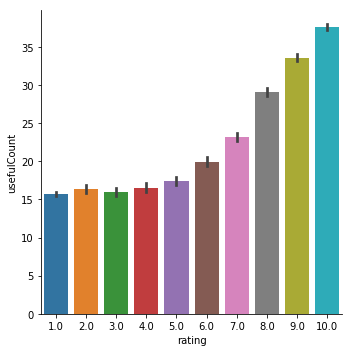

In [8]:
sns.catplot(x='rating', y='usefulCount', data=train, kind='bar')

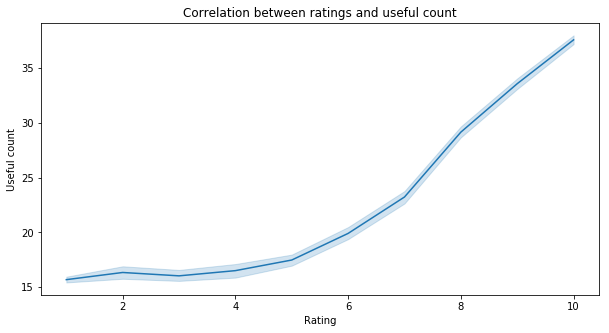

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(x='rating', y='usefulCount', data=train)

plt.xlabel('Rating')
plt.ylabel('Useful count')
plt.title("Correlation between ratings and useful count")
plt.show()

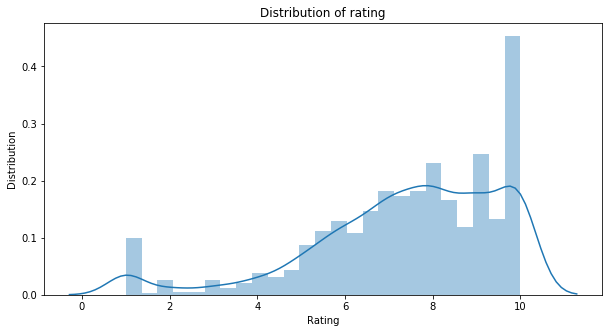

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(train.groupby('drugName')['rating'].mean())

plt.xlabel('Rating')
plt.ylabel('Distribution')
plt.title("Distribution of rating")
plt.show()

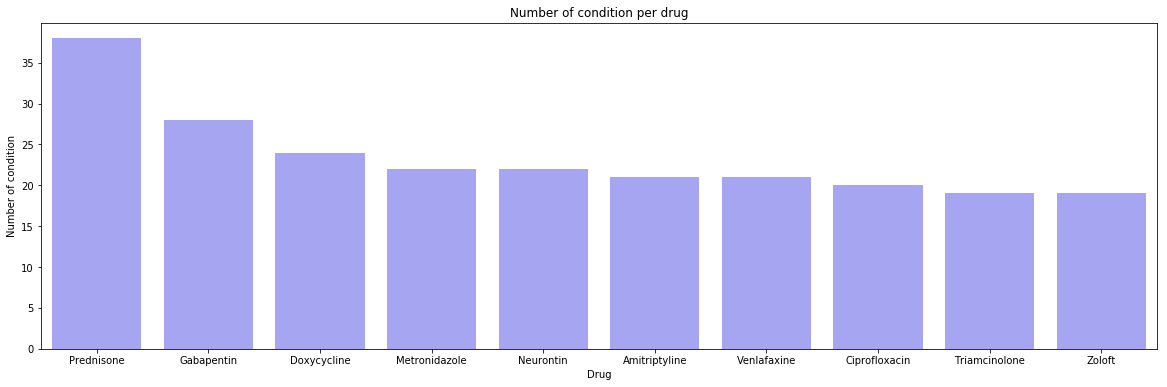

In [11]:
drugs_per_condition = train.groupby('drugName')['condition'].nunique().sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(drugs_per_condition[:10].index, drugs_per_condition[:10],color='blue',alpha=0.4)

plt.xlabel('Drug')
plt.ylabel('Number of condition')
plt.title("Number of condition per drug")
plt.show()

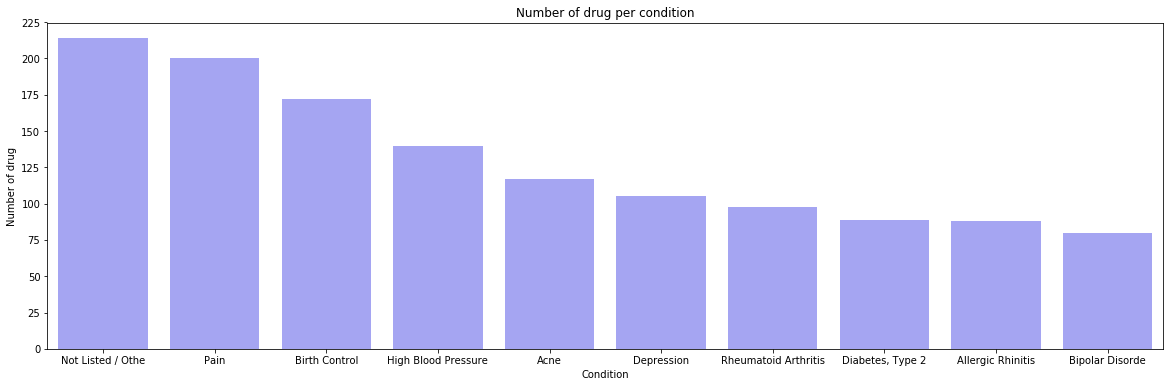

In [12]:
condition_per_drugs = train.groupby('condition')['drugName'].nunique().sort_values(ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(condition_per_drugs[:10].index, condition_per_drugs[:10],color='blue',alpha=0.4)

plt.xlabel('Condition')
plt.ylabel('Number of drug')
plt.title("Number of drug per condition")
plt.show()

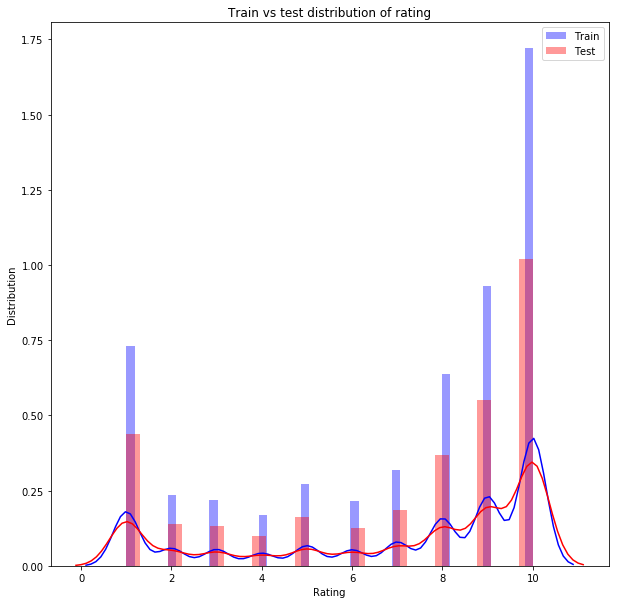

In [13]:
plt.figure(figsize=(10,10))
sns.distplot(train.rating, label='Train', color='blue')
sns.distplot(test.rating, label='Test', color='red')

plt.xlabel('Rating')
plt.ylabel('Distribution')
plt.title("Train vs test distribution of rating")
plt.legend()
plt.show()